# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep
from time import time

# Simulate data

In [65]:
# random seed for reproducibility
np.random.seed(666)

# define number of elements
n = 30

# random numbers from standard normal distribution

u = np.random.normal(0, 1, n)
v = np.random.normal(0, 1, n)

# x data scaled by defined mean and sigma
mu1 = 0
sig1 = 1
x = mu1 + sig1 * u

# y data scaled by defined mean, sigma, and with p correlation with x
mu2 = 0.2
sig2 = 0.3
p = 0.65
y = sig2 * (p * u + np.sqrt(1 - p**2) * v) + mu2

# correlation coefficient of data
np.corrcoef(x, y)

array([[1.        , 0.75233126],
       [0.75233126, 1.        ]])

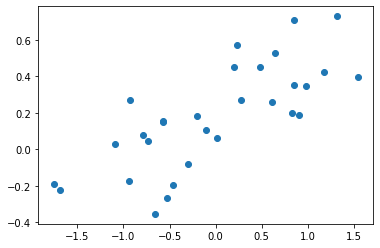

In [3]:
plt.scatter(x,y)

# Create line

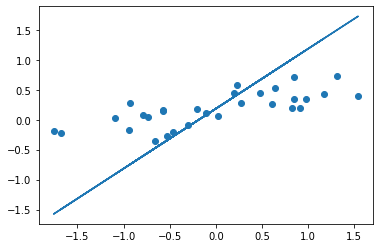

In [141]:
b0 = np.mean(y)
b1 = 1

yhat = b1 * x + b0

plt.scatter(x, y)
plt.plot(x, yhat)

Execution time in seconds: 0.053618431091308594


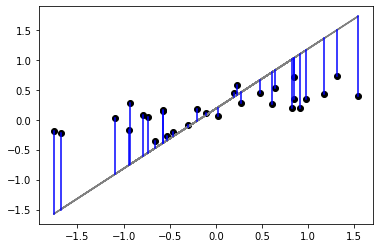

In [142]:
X = np.matrix([x,x])
Y = np.matrix([y, yhat])

startTime = time()

plt.scatter(x, y, color="black" ) 
plt.plot(x, yhat, color="grey")
plt.plot(X, Y, color="blue")

executionTime = (time() - startTime)
print('Execution time in seconds: ' + str(executionTime))


Execution time in seconds: 0.05699896812438965


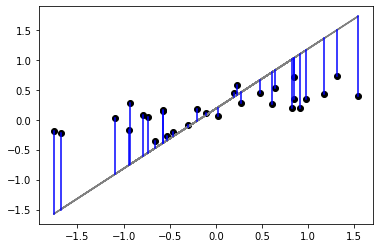

In [6]:
startTime = time()

plt.scatter(x, y, color="black" ) 
plt.plot(x, yhat, color="grey")
for ii in np.arange(0, len(x)):
    plt.plot([x[ii], x[ii]], [y[ii], yhat[ii]], color="blue")
    
executionTime = (time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

In [63]:
np.arange(0, 10, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

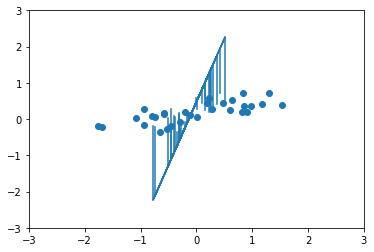

In [7]:
A = np.matrix([x, yhat])

for degs in np.arange(0, 30):
    vxcomponent = np.cos(np.deg2rad(degs))
    vycomponent = np.sin(np.deg2rad(degs))

    wxcomponent = np.cos(np.deg2rad(degs+90))
    wycomponent = np.sin(np.deg2rad(degs+90))

    base = np.matrix([[vxcomponent, wxcomponent], [vycomponent, wycomponent]])

    A_trans = np.matmul(base, A)
    for jj in np.arange(0, len(x)):
        
        plt.plot([A_trans[0,jj], A_trans[0,jj]],
                 [y[jj], A_trans[1,jj]], 
                 color="#1f78b4")

    plt.scatter(x, y)
    plt.plot(A_trans[0,:].T, A_trans[1,:].T)
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    plt.show()

    sleep(0.1)
    clear_output(wait = True)

## Animation of fitted line with residuals

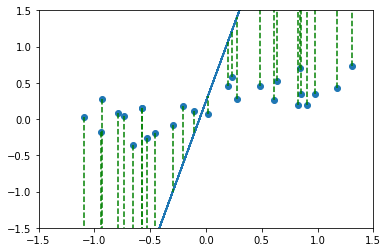

In [140]:
# Calculate slopes for different b0's
B = np.arange(0.15, 0.25, 0.005)
M = (y.mean() - B) / x.mean()

# axis limits
xlim = [-1.5, 1.5]
ylim = [-1.5, 1.5]

# for loop for animation
for b,m in zip(B,M):
    
    # predicted y from parameters m (slope) and b (y intersection)
    yhat = m*x + b 
    
    plt.scatter(x,y) # scatter plot of data
    plt.plot(x, yhat) # fitted data
    plt.plot([x, x], [y, yhat], linestyle='--', color="green") # residuals / error
    
    # format plot
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()
    
    # show each graph in consecutive frames
    sleep(0.2)
    clear_output(wait=True)


# Angle rotation tests

In [80]:
for degs in np.arange(0, 90,5):

    vxcomponent = np.cos(np.deg2rad(degs))
    vycomponent = np.sin(np.deg2rad(degs))
    vbase_new = [vxcomponent, vycomponent]

    wxcomponent = np.cos(np.deg2rad(degs+90))
    wycomponent = np.sin(np.deg2rad(degs+90))
    wbase_new = [wxcomponent, wycomponent]

    plt.plot(vbase, z, color="black")
    plt.plot(z, wbase, color = "grey")
    plt.plot([0, vxcomponent], [0, vycomponent])
    plt.plot([0, wxcomponent], [0, wycomponent])
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.show()
    sleep(0.01)
    clear_output(wait=True)

NameError: name 'vbase' is not defined

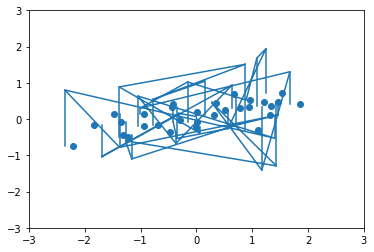

In [79]:
A = np.matrix([x, yhat])

for degs in np.arange(0, 10):
    vxcomponent = np.cos(np.deg2rad(degs))
    vycomponent = np.sin(np.deg2rad(degs))

    wxcomponent = np.cos(np.deg2rad(degs+90))
    wycomponent = np.sin(np.deg2rad(degs+90))

    base = np.matrix([[vxcomponent, wxcomponent], [vycomponent, wycomponent]])

    A_trans = np.matmul(base, A)
    for jj in np.arange(0, len(x)):
        plt.plot([A_trans[0,jj], A_trans[0,jj]],
                 [y[jj], A_trans[1,jj]], 
                 color="#1f78b4")

    plt.scatter(x, y)
    plt.plot(A_trans[0,:].T, A_trans[1,:].T)
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    plt.show()

    sleep(0.1)
    clear_output(wait = True)